In [116]:
from IPython.display import display
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [117]:
import os
os.getcwd()

'/home/aler/vlavado_nubes/ResNet18_RAM'

In [118]:
data = pd.read_csv('dataplot_resnet18.csv', sep=',')
# data = pd.read_csv('dataplot_resnet18_orig.csv', sep=',')
data.head()

,Unnamed: 0,train loss,valid loss,test loss,acc train,acc valid,acc test
0,0,1.988317,1.945555,1.965630,37.351443,44.736842,45.363409
1,1,1.703966,1.572839,1.669476,51.952462,58.947368,56.140351
2,2,1.598064,1.419180,1.592713,52.461800,57.894737,57.393484
3,3,1.508258,1.380995,1.549921,54.838710,61.578947,56.641604
4,4,1.482737,1.331742,1.512132,55.857385,62.105263,56.390977


In [119]:
best_val_iter = data['acc valid'].argmax()
print(best_val_iter)
print(data['acc valid'][best_val_iter])
print(data['acc test'][best_val_iter])

1865
100.0
80.20050125313283


Text(0.5, 1.0, 'Losses in ResNet 18')

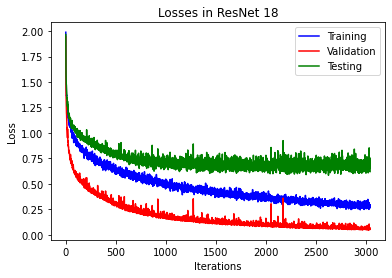

In [120]:
plt.plot(data['train loss'],'-b',label='Training')
plt.plot(data['valid loss'],'-r',label='Validation')
plt.plot(data['test loss'],'-g',label='Testing')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Losses in ResNet 18')

Text(0.5, 1.0, 'Accuracy in ResNet 18')

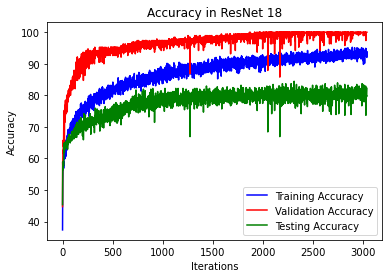

In [121]:
plt.plot(data['acc train'],'-b',label='Training Accuracy')
plt.plot(data['acc valid'],'-r',label='Validation Accuracy')
plt.plot(data['acc test'],'-g',label='Testing Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy in ResNet 18')

In [122]:
min_lossval = min(data['valid loss']) # Obtain the minimum loss in the validation set
min_lossval 

0.0481120541856701

In [123]:
for i in range(0,len(data['valid loss'])):
    if data['valid loss'][i] == min(data['valid loss']):
        min_epoch = i # Obtain the epoch where minimum loss happens
        print(i)

3015


In [ ]:
# Accuracy in the testing partition corresponding to the cycle of minimum validation loss
max1 = data['acc test'].iloc[min_epoch]
max1

: 

In [125]:
# Max accuracy in the testing partition 
max2 = max(data['acc test'])
max2

84.46115288220551

In [126]:
# dataframe of predicted labels (once encoded)
predlabel = pd.read_csv('pred_resnet18.csv', sep=',') 
# predlabel = pd.read_csv('pred_resnet18_orig.csv', sep=',')
display(predlabel.head())
# dataframe of true labels (once encoded)
truelabel = pd.read_csv('true_resnet18.csv', sep=',')
# truelabel = pd.read_csv('true_resnet18_orig.csv', sep=',')
display(truelabel.head())

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,389,390,391,392,393,394,395,396,397,398
0,0,5,5,5,5,5,7,5,5,5,...,3,3,3,3,3,3,3,3,3,3
1,1,5,5,5,5,7,7,5,5,5,...,8,3,3,3,3,3,8,8,8,8
2,2,5,3,4,5,5,7,5,4,4,...,8,8,8,8,3,8,8,8,8,8
3,3,5,5,5,5,7,7,5,5,5,...,8,3,3,3,3,3,8,8,8,8
4,4,5,5,5,5,7,7,5,5,5,...,8,3,3,3,3,3,8,8,8,8


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,389,390,391,392,393,394,395,396,397,398
0,0,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,3,3
1,1,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,3,3
2,2,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,3,3
3,3,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,3,3
4,4,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,3,3


In [127]:
# drop the first column as it is not part of the labels
predlabel = predlabel.drop(labels='Unnamed: 0', axis=1)
truelabel = truelabel.drop(labels='Unnamed: 0', axis=1)
# Use the epoch with the minimum validation loss to obtain the encoded labels
predlist = predlabel.iloc[min_epoch].tolist()
truelist = truelabel.iloc[min_epoch].tolist()
# Compute the classes
labels =  ['altocumulus', 'altostratus', 'clear sky', 'cirrus', 'cirrcumulus', 'cirrostratus', 'cumuluss', 'stratus', 'stratocumulus']

In [128]:
predlist

[0,
 0,
 0,
 0,
 1,
 7,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 3,
 3,
 3,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 1,
 1,
 1,
 1,
 8,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 8,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 8,
 0,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 3,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 7,
 0,
 0,
 0,
 8,
 8,
 8,
 0,
 8,
 0,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 8,
 3,
 6,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 7,
 1,


In [129]:
truelist

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [130]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Compute macroaverage measure
    
    constant = (1/len(classes))
    macroaverage = 0
    for k in range(0,len(classes)):
        macroaverage += cm[k,k]/np.sum(cm[k,:],axis=0)
    macroaverage = constant * macroaverage * 100
    print('Macroaverage is equal to: {} %'.format(macroaverage))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax, shrink=0.62)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_ylim(8.5, -0.5)
    #plt.grid(None)
    plt.title(label=title, pad=20)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_figheight(8)
    fig.set_figwidth(8)
    fig.tight_layout()
    return ax

Macroaverage is equal to: 76.02213326867704 %
Confusion matrix, without normalization
[[40  1  0  0  2  0  4  1  1]
 [ 0 11  0  0  0  0  0  2  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 2  0  0 81  0  5  0  0  0]
 [ 2  4  0  2  0  0  0  1  0]
 [ 0  0  0  6  0 33  0  0  0]
 [ 0  0  0  6  0  0 28  0  1]
 [ 0  0  0  0  0  0  0 67  0]
 [21  0  1  9  0  0  2  3 57]]
Macroaverage is equal to: 76.02213326867704 %
Normalized confusion matrix
[[0.81632653 0.02040816 0.         0.         0.04081633 0.
  0.08163265 0.02040816 0.02040816]
 [0.         0.84615385 0.         0.         0.         0.
  0.         0.15384615 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.02272727 0.         0.         0.92045455 0.         0.05681818
  0.         0.         0.        ]
 [0.22222222 0.44444444 0.         0.22222222 0.         0.
  0.         0.11111111 0.        ]
 [0.         0.         0.         0.15384615 0.         0.84615385
  0.         

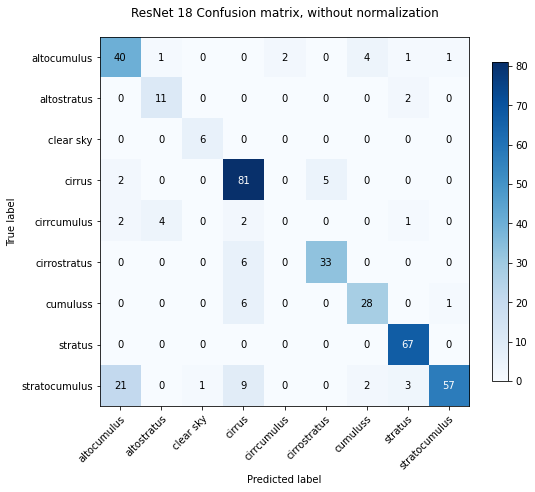

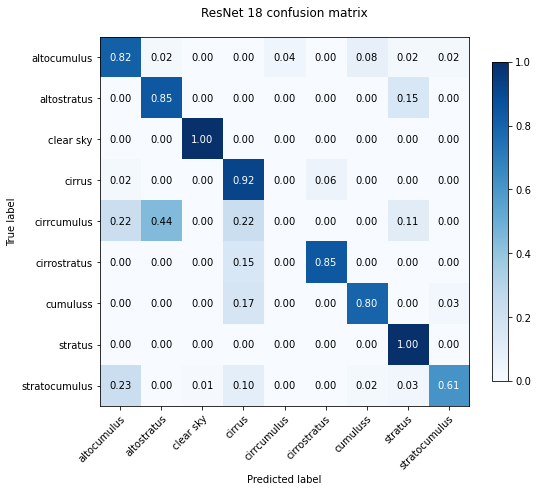

In [131]:
# Plot non-normalized confusion matrix
fig_noNorm = plot_confusion_matrix(y_true=truelist, y_pred=predlist, classes=labels,
                      title='ResNet 18 Confusion matrix, without normalization')

fig_noNorm.figure.savefig('ResNet 18 Confusion matrix, without normalization' + ".png")

# Plot normalized confusion matrix
fig_Norm = plot_confusion_matrix(y_true=truelist, y_pred=predlist, classes=labels, normalize=True,
                      title='ResNet 18 confusion matrix')

fig_Norm.figure.savefig('ResNet 18 Normalized confusion matrix' + ".png")

In [83]:
print('Mean of the 3 accuracies: {:.2f}' .format(np.mean([98.48484848484848, 97.979797979798, 97.979797979798])))
print('Std of the 3 accuracies: {:.2f}' .format(np.std([98.48484848484848, 97.979797979798, 97.979797979798])))

print('Mean of the 3 macroaccuracies: {:.2f}' .format(np.mean([98.91414141414141, 98.46257446257445, 97.94310627643961])))
print('Std of the 3 macroaccuracies: {:.2f}' .format(np.std([98.91414141414141, 98.46257446257445, 97.94310627643961])))


Mean of the 3 accuracies: 98.15
Std of the 3 accuracies: 0.24
Mean of the 3 macroaccuracies: 98.44
Std of the 3 macroaccuracies: 0.40
